## Scroll down until "NEWS ANALYSIS" for latest code

In [1]:
#!pip install tensorflow
#!pip install tf-keras
#%pip install torch
#%pip install transformers

import pandas as pd
import numpy as np

### Joblib: VERY handy to save big outputs of code

In [ ]:
#%pip install joblib  

In [48]:
from joblib import dump
from joblib import load

In [ ]:
# (This is an example)
# To save a value/output:
dump(results_apple, 'results_apple.joblib')

# To load a value/output:
loaded_model = load('results_apple.joblib')
print(loaded_model[:5])

In [4]:
df_tweets = pd.read_csv("stock_tweets_kaggle.csv")
df_tweets.head()

,Date,Tweet,Stock Name,Company Name
0,2022-09-29 23:41:16+00:00,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc."
1,2022-09-29 23:24:43+00:00,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc."
2,2022-09-29 23:18:08+00:00,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc."
3,2022-09-29 22:40:07+00:00,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc."
4,2022-09-29 22:27:05+00:00,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc."


In [5]:
df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"].copy()
df_apple

,Date,Tweet,Stock Name,Company Name
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.
...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.


In [40]:
df_microsoft = df_tweets[df_tweets["Stock Name"] == "MSFT"].copy()
df_google = df_tweets[df_tweets["Stock Name"] == "GOOG"].copy()

In [41]:
df_google

,Date,Tweet,Stock Name,Company Name
52440,2022-09-29 15:10:30+00:00,Top 10 $QQQ Holdings \n\nAnd Credit Rating\n\n...,GOOG,Alphabet Inc.
52441,2022-09-29 13:02:19+00:00,That's right everyone - $GOOG is officially a ...,GOOG,Alphabet Inc.
52442,2022-09-29 10:18:43+00:00,Stocks I think entering intriguing levels to a...,GOOG,Alphabet Inc.
52443,2022-09-29 09:20:12+00:00,it is my duty to put this round goog on tl reg...,GOOG,Alphabet Inc.
52444,2022-09-29 04:59:06+00:00,$GOOG smells of Ballmer-era $MSFT. Founders de...,GOOG,Alphabet Inc.
...,...,...,...,...
53726,2021-10-02 13:55:00+00:00,Which portfolio are you holding for 3 years?\n...,GOOG,Alphabet Inc.
53727,2021-10-02 10:42:49+00:00,The weather is so terrible \n\n I gotta g...,GOOG,Alphabet Inc.
53728,2021-10-01 16:00:13+00:00,"Google Abandons Plans to Offer Bank Accounts, ...",GOOG,Alphabet Inc.
53729,2021-10-01 13:02:33+00:00,Chainlink Refused to Sell Itself to Google.\nG...,GOOG,Alphabet Inc.


# TWEETS ANALYSIS

In [15]:
from transformers import AutoModel, AutoTokenizer
from transformers import pipeline, AutoModelForSequenceClassification

# Model used: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest?text=Covid+cases+are+increasing+fast%21
# Load tokenizer and model from Hugging Face Hub
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, output_hidden_states=True)
# for getting embeddings, it is important to have output_hidden_states=True, otherwise, you wont get embeddings

# Create a sentiment analysis pipeline using the loaded model and tokenizer
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Label_2: Positive
# Label_1: Neutral
# Label_0: Negative 
#results_apple = [(tweet, sentiment_pipeline(tweet)) for tweet in df_apple["Tweet"]]

# ~ 15 mins

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
%time results_apple = [(tweet, sentiment_pipeline(tweet)) for tweet in df_apple["Tweet"]]
results_apple[:5]

CPU times: total: 1h 28min 53s
Wall time: 13min 30s


[("$NIO just because I'm down money doesn't mean this is a bad investment. The whole market, everything sucks right now. 2-5 years from now, I'm confident it will pay off. Long the best $AAPL $AMZN $TSLA $GOOGL $NIO",
  [{'label': 'negative', 'score': 0.4823355972766876}]),
 ('After trading for 9+ years \n\nThis is how to find entries and exits and scale out of positions \n\nRT Like and Subscribe 🔔\n$SPY $SPX $QQQ $AAPL $AMD \n\nhttps://t.co/o9UBtIakxu',
  [{'label': 'neutral', 'score': 0.7913577556610107}]),
 ('Not something you see very often.  \n-2 ATR move on $AAPL https://t.co/CVLgPWHz3F',
  [{'label': 'neutral', 'score': 0.8344758152961731}]),
 ('$AAPL was down almost 5% today. Rare to see it sell off like this. Headline was fears of demand slowly triggered the BofA downgrade. \n\nDespite the fears, demand seems to be favorable for iPhone 14. At least for today.',
  [{'label': 'negative', 'score': 0.5712100267410278}]),
 ('$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT THAT HAD B

In [31]:
dump(results_apple, 'results_apple.joblib')

['results_apple.joblib']

In [42]:
%time results_microsoft = [(tweet, sentiment_pipeline(tweet)) for tweet in df_microsoft["Tweet"]]
results_microsoft[:5]
dump(results_microsoft, 'results_microsoft.joblib')

CPU times: total: 1h 11min 32s
Wall time: 13min 8s


['results_microsoft.joblib']

In [43]:
results_google = [(tweet, sentiment_pipeline(tweet)) for tweet in df_google["Tweet"]]
results_google[:5]
dump(results_google, 'results_google.joblib')

['results_google.joblib']

In [44]:
df_tesla = df_tweets[df_tweets["Stock Name"] == "TSLA"].sample(n=5056, random_state=1)
%time results_tesla = [(tweet, sentiment_pipeline(tweet)) for tweet in df_tesla["Tweet"]]
results_tesla[:5]

CPU times: total: 1h 20min 32s
Wall time: 15min 35s


[('@AukeHoekstra @BrianGitt @Tesla @VW @TUeindhoven Insane that people still try to get away with that "battery needs replacement" shit\n\nThere are 10s of millions of EVs on the road, it\'s not a matter of calculations and theory, they literally don\'t need replacements in practice',
  [{'label': 'negative', 'score': 0.705970823764801}]),
 ('@AnandWrites Glad I don’t work for @Tesla - imagine the toxic approach towards diversity and inclusion they must have..',
  [{'label': 'negative', 'score': 0.8834050893783569}]),
 ('Don’t be scared. Don’t panic. \n\nThese are the times to scoop up the best companies on the low. \n\nNibble nibble nibble. \n\nLittle by little, the tide will turn in our favor.\n\nOnce inflation metrics cool off, that’s when we’ll moon.\n\nUntil then, I’m loading the booster.\n\n$TSLA',
  [{'label': 'positive', 'score': 0.7431896924972534}]),
 ('Good number out of China last night. However, I think the markets expected it to be good. $TSLA',
  [{'label': 'positive', '

In [45]:
final_scores = []
for result in results_apple:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_apple.loc[:,"score"] = final_scores
df_apple

# Score of 1: Very positive about Apple
# Score of 0: Very neutral about Apple
# Score of -1: Very negative about Apple

,Date,Tweet,Stock Name,Company Name,score
55958,2022-09-29 22:23:54+00:00,$NIO just because I'm down money doesn't mean ...,AAPL,Apple Inc.,-0.482336
55959,2022-09-29 20:37:01+00:00,After trading for 9+ years \n\nThis is how to ...,AAPL,Apple Inc.,0.000000
55960,2022-09-29 20:19:43+00:00,Not something you see very often. \n-2 ATR mo...,AAPL,Apple Inc.,0.000000
55961,2022-09-29 20:13:48+00:00,$AAPL was down almost 5% today. Rare to see it...,AAPL,Apple Inc.,-0.571210
55962,2022-09-29 19:50:00+00:00,$AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...,AAPL,Apple Inc.,0.000000
...,...,...,...,...,...
61009,2021-09-30 15:37:52+00:00,"All about this trendline now on $AAPL, continu...",AAPL,Apple Inc.,-0.708965
61010,2021-09-30 15:30:03+00:00,This thread is just a broad overview of the ba...,AAPL,Apple Inc.,0.000000
61011,2021-09-30 13:36:10+00:00,"In 2020, Tim Cook, CEO of $AAPL, earned $265,0...",AAPL,Apple Inc.,0.578797
61012,2021-09-30 10:22:53+00:00,The media is really pushing hard for their big...,AAPL,Apple Inc.,-0.799822


In [ ]:
df_apple.describe()

In [46]:
#%pip install pandas-datareader
#%pip install yfinance
import datetime
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

# COLLECTIVE METHOD:

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL']
aapl_stock = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
aapl_stock = aapl_stock.reset_index(level='Ticker', drop=True).reset_index()
aapl_stock.head()

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,56.987499,57.355000,56.587502,56.814999,54.199272,94403200
1,2018-10-02,56.812500,57.500000,56.657501,57.320000,54.681023,99152800
2,2018-10-03,57.512501,58.367500,57.445000,58.017502,55.346416,114619200
3,2018-10-04,57.695000,58.087502,56.682499,56.997501,54.373379,128168000
4,2018-10-05,56.990002,57.102501,55.145000,56.072498,53.490955,134322000


In [ ]:
#%pip install seaborn

In [50]:
aapl_stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-10-01,56.987499,57.355000,56.587502,56.814999,54.199272,94403200
1,2018-10-02,56.812500,57.500000,56.657501,57.320000,54.681023,99152800
2,2018-10-03,57.512501,58.367500,57.445000,58.017502,55.346416,114619200
3,2018-10-04,57.695000,58.087502,56.682499,56.997501,54.373379,128168000
4,2018-10-05,56.990002,57.102501,55.145000,56.072498,53.490955,134322000
...,...,...,...,...,...,...,...
1316,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
1317,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
1318,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
1319,2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900


aapl_stock Date Range: 2018-10-01 00:00:00 to 2023-12-29 00:00:00
df_apple Date Range: 2021-09-30 00:00:00 to 2022-09-29 00:00:00
Number of rows in df_merged: 252


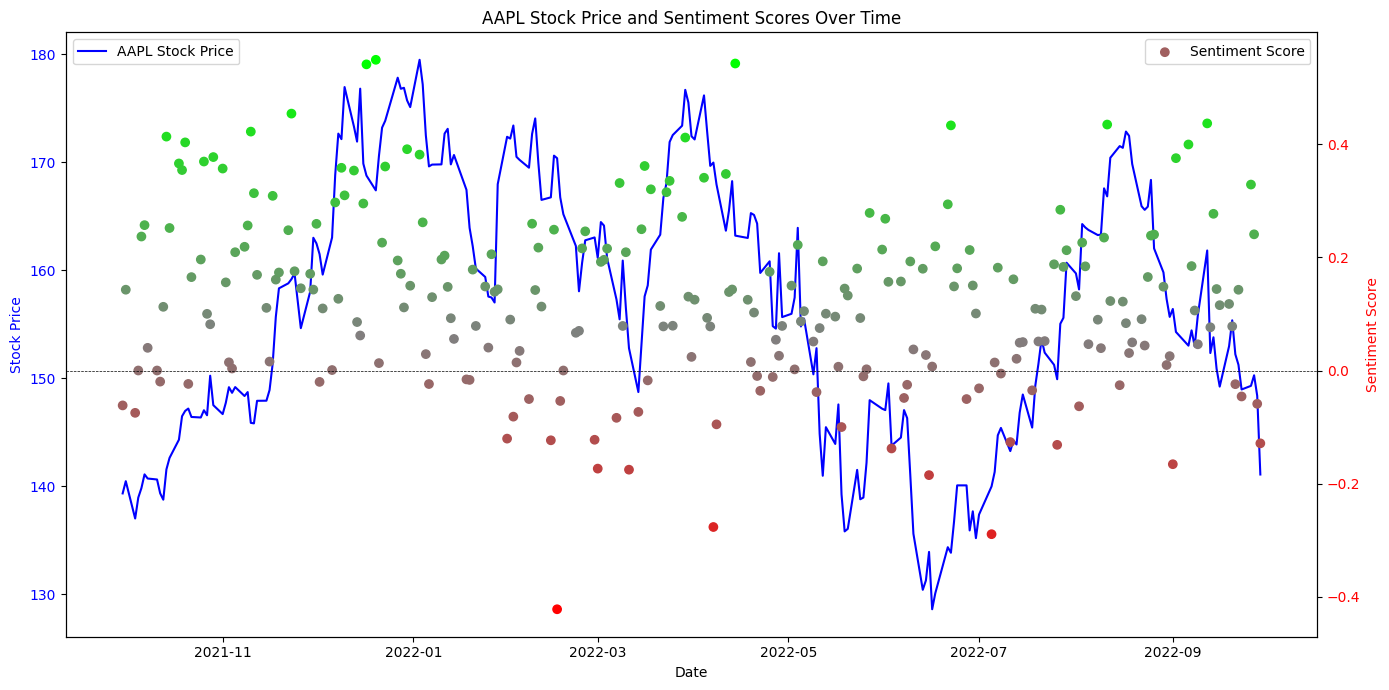

In [51]:
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.tz_localize(None)
aapl_stock['Date'] = pd.to_datetime(aapl_stock['Date']).dt.normalize()

# Check date ranges of both dataframes
print("aapl_stock Date Range:", aapl_stock['Date'].min(), "to", aapl_stock['Date'].max())
print("df_apple Date Range:", df_apple['Date'].min(), "to", df_apple['Date'].max())

# Filter df_apple to only include dates within the aapl_stock date range
df_apple_filtered = df_apple[(df_apple['Date'] >= aapl_stock['Date'].min()) & (df_apple['Date'] <= aapl_stock['Date'].max())]

# Aggregate sentiment scores by taking the mean for each date
df_apple_agg = df_apple_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

# Merge the aggregated df_apple with aapl_stock on Date
df_merged = pd.merge(aapl_stock, df_apple_agg, on='Date', how='inner')

# Check number of rows in the merged dataframe
print("Number of rows in df_merged:", len(df_merged))

# Define a custom color map
colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
n_bins = 100  # Discretize the color map into 100 bins
cmap_name = 'sentiment_cmap'
sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Normalize the sentiment scores to [0, 1] for color mapping
norm = plt.Normalize(df_merged['score'].min(), df_merged['score'].max())
sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
df_merged['color'] = df_merged['score'].apply(lambda x: sm.to_rgba(x))

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot stock prices (e.g., Adj Close) on the primary y-axis
sns.lineplot(x='Date', y='Adj Close', data=df_merged, ax=ax1, color='blue', label='AAPL Stock Price')
ax1.set_ylabel('Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot sentiment scores on the secondary y-axis
ax2 = ax1.twinx()
ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], label='Sentiment Score')
ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at sentiment score 0.0
ax2.set_ylabel('Sentiment Score', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and legends
plt.title('AAPL Stock Price and Sentiment Scores Over Time')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [52]:
#df_apple = df_tweets[df_tweets["Stock Name"] == "AAPL"]

# Concatenate the Apple and sampled Tesla tweets
df_apple_tesla = pd.concat([df_apple, df_tesla]).reset_index(drop=True)

# Display the resulting DataFrame
print(df_apple_tesla)

                            Date  \
0            2022-09-29 00:00:00   
1            2022-09-29 00:00:00   
2            2022-09-29 00:00:00   
3            2022-09-29 00:00:00   
4            2022-09-29 00:00:00   
...                          ...   
10107  2022-08-24 19:16:24+00:00   
10108  2022-01-28 20:19:22+00:00   
10109  2022-06-28 16:14:08+00:00   
10110  2022-06-16 10:20:57+00:00   
10111  2022-04-20 14:48:25+00:00   

                                                   Tweet Stock Name  \
0      $NIO just because I'm down money doesn't mean ...       AAPL   
1      After trading for 9+ years \n\nThis is how to ...       AAPL   
2      Not something you see very often.  \n-2 ATR mo...       AAPL   
3      $AAPL was down almost 5% today. Rare to see it...       AAPL   
4      $AAPL APPLE JUST FIRED ITS HEAD OF PROCUREMENT...       AAPL   
...                                                  ...        ...   
10107  thankful af it's a public company and to be al...       TSLA   

In [53]:
final_scores = []
for result in results_tesla:
    sentiment = result[1][0]
    label = sentiment["label"]
    score = sentiment["score"]

    # LABEL_0: Negative
    # LABEL_1: Neutral
    # LABEL_2: Positive
    if label == "positive":
        final_scores.append(score)
    elif label == "negative":
        final_scores.append(-1*score)
    else:
        final_scores.append(0)
df_tesla.loc[:,"score"] = final_scores
df_tesla

# Score of 1: Very positive about Apple
# Score of 0: Very neutral about Apple
# Score of -1: Very negative about Apple

,Date,Tweet,Stock Name,Company Name,score
11766,2022-05-15 22:27:46+00:00,@AukeHoekstra @BrianGitt @Tesla @VW @TUeindhov...,TSLA,"Tesla, Inc.",-0.705971
18861,2022-03-14 11:12:26+00:00,@AnandWrites Glad I don’t work for @Tesla - im...,TSLA,"Tesla, Inc.",-0.883405
69,2022-09-29 13:18:36+00:00,Don’t be scared. Don’t panic. \n\nThese are th...,TSLA,"Tesla, Inc.",0.743190
36275,2021-10-12 10:33:37+00:00,"Good number out of China last night. However, ...",TSLA,"Tesla, Inc.",0.907607
27475,2021-12-22 16:49:38+00:00,There is no “next Tesla”\n\nThere is only one ...,TSLA,"Tesla, Inc.",0.000000
...,...,...,...,...,...
2731,2022-08-24 19:16:24+00:00,thankful af it's a public company and to be al...,TSLA,"Tesla, Inc.",0.980714
22537,2022-01-28 20:19:22+00:00,I'm not a big fan of everyone telling @elonmus...,TSLA,"Tesla, Inc.",-0.749684
7759,2022-06-28 16:14:08+00:00,Volkswagen’s presentation about its EV divisio...,TSLA,"Tesla, Inc.",0.000000
8507,2022-06-16 10:20:57+00:00,Tesla has the ability to raise price at will f...,TSLA,"Tesla, Inc.",0.000000


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


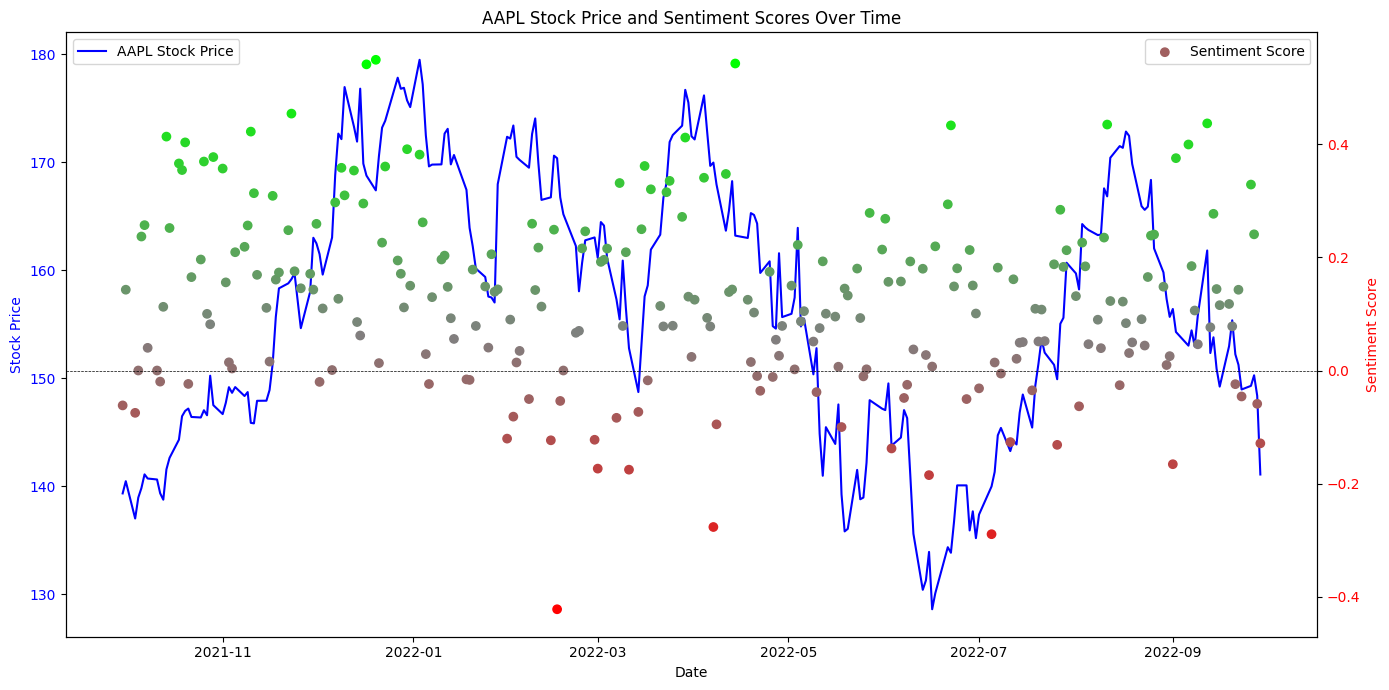

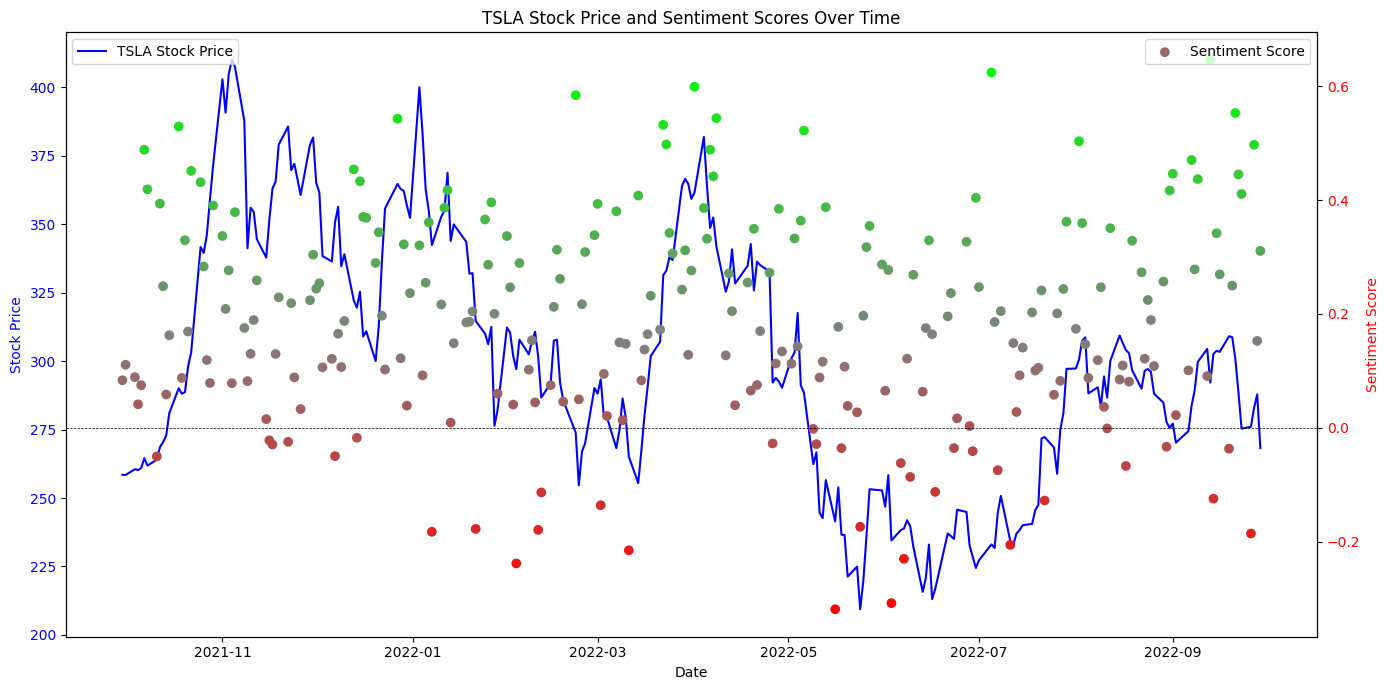

In [55]:
tickers = ['AAPL', 'TSLA']
stock_data = get(tickers, datetime.datetime(2018, 10, 1), datetime.datetime(2024, 1, 1))
stock_data = stock_data.reset_index(level='Ticker').reset_index()

df_apple['Date'] = pd.to_datetime(df_apple['Date']).dt.normalize().dt.tz_localize(None)
df_tesla['Date'] = pd.to_datetime(df_tesla['Date']).dt.normalize().dt.tz_localize(None)
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.normalize().dt.tz_localize(None)

# Function to plot sentiment scores and stock prices
def plot_sentiment_stock(df_sentiment, stock_ticker):
    # Filter stock data for the specific ticker
    stock_df = stock_data[stock_data['Ticker'] == stock_ticker]

    # Filter df_sentiment to only include dates within the stock_df date range
    df_sentiment_filtered = df_sentiment[(df_sentiment['Date'] >= stock_df['Date'].min()) & (df_sentiment['Date'] <= stock_df['Date'].max())]

    # Aggregate sentiment scores by taking the mean for each date
    df_sentiment_agg = df_sentiment_filtered.groupby('Date').agg({'score': 'mean'}).reset_index()

    # Merge the aggregated sentiment data with stock data on Date
    df_merged = pd.merge(stock_df, df_sentiment_agg, on='Date', how='inner')
    

    # Define a custom color map
    colors = [(1, 0, 0), (0.5, 0.5, 0.5), (0, 1, 0)]  # R -> Gray -> G
    n_bins = 100  # Discretize the color map into 100 bins
    cmap_name = 'sentiment_cmap'
    sentiment_cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

    # Normalize the sentiment scores to [0, 1] for color mapping
    norm = plt.Normalize(df_merged['score'].min(), df_merged['score'].max())
    sm = plt.cm.ScalarMappable(cmap=sentiment_cmap, norm=norm)
    df_merged['color'] = df_merged['score'].apply(lambda x: sm.to_rgba(x))

    # Plotting
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot stock prices (e.g., Adj Close) on the primary y-axis
    sns.lineplot(x='Date', y='Adj Close', data=df_merged, ax=ax1, color='blue', label=f'{stock_ticker} Stock Price')
    ax1.set_ylabel('Stock Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Plot sentiment scores on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.scatter(df_merged['Date'], df_merged['score'], color=df_merged['color'], label='Sentiment Score')
    ax2.axhline(y=0.0, color='black', linestyle='--', linewidth=0.5)  # Add horizontal line at sentiment score 0.0
    ax2.set_ylabel('Sentiment Score', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Title and legends
    plt.title(f'{stock_ticker} Stock Price and Sentiment Scores Over Time')
    fig.tight_layout()
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

# Plot for Apple
plot_sentiment_stock(df_apple, 'AAPL')

# Plot for Tesla
plot_sentiment_stock(df_tesla, 'TSLA')

Notes to myself:
Use RobustScaler to highlight outliers

Outlier: +1 score
Outlier in downwards trend: +2 score
Outlier in downwards trend, while stock is below average price: +5 score

appl
tesla
microsoft
google

# NEWS ANALYSIS

In [ ]:
#%pip install yahoo_fin
#%pip install python-dateutil

In [56]:
import numpy as np
import pandas as pd
from yahoo_fin import news
from dateutil import parser
import datetime
import pytz

# Define the ticker symbol for the stock of interest
ticker = "PHG"  # Apple Inc.

# Fetch news articles related to the specified stock
news_articles = news.get_yf_rss(ticker)

# Define the date range and make them timezone-aware (UTC)
start_date = datetime.datetime(2024, 1, 1, tzinfo=pytz.UTC)
end_date = datetime.datetime(2024, 12, 31, tzinfo=pytz.UTC)

# Filter articles by date
filtered_articles = []
for article in news_articles:
    pub_date_str = article.get('published', article.get('pubDate', 'N/A'))
    print("Raw publication date string:", pub_date_str)
    
    try:
        pub_date = parser.parse(pub_date_str)
        print("Parsed publication date:", pub_date)
        
        if start_date <= pub_date <= end_date:
            filtered_articles.append(article)
            print("Article within date range:", article['title'])
        else:
            print("Article outside date range")
    except (ValueError, TypeError) as e:
        # Handle parsing errors or missing dates
        print("Error parsing date:", e)
        pass

# Display the filtered news articles
for article in filtered_articles:
    print("Title:", article.get('title', 'N/A'))
    print("Link:", article.get('link', 'N/A'))
    print("Date:", article.get('published', article.get('pubDate', 'N/A')))
    print("Description:", article.get('summary', article.get('description', 'N/A')))
    print("\n")

print(f"Total articles between {start_date.date()} and {end_date.date()}: {len(filtered_articles)}")


Raw publication date string: Fri, 12 Jul 2024 18:55:21 +0000
Parsed publication date: 2024-07-12 18:55:21+00:00
Article within date range: China’s Transsion sued by Qualcomm and Philips as IP woes mount
Raw publication date string: Fri, 12 Jul 2024 14:46:00 +0000
Parsed publication date: 2024-07-12 14:46:00+00:00
Article within date range: Philips (PHG) Gains Despite Recall of SENSE XL Torso Coils
Raw publication date string: Tue, 09 Jul 2024 10:57:50 +0000
Parsed publication date: 2024-07-09 10:57:50+00:00
Article within date range: Philips recall of imaging coils tied to 12 injuries
Raw publication date string: Wed, 03 Jul 2024 10:59:15 +0000
Parsed publication date: 2024-07-03 10:59:15+00:00
Article within date range: Artisan Investments raises stake in Philips to 10%, regulatory filing shows
Raw publication date string: Wed, 03 Jul 2024 06:00:00 +0000
Parsed publication date: 2024-07-03 06:00:00+00:00
Article within date range: Philips appoints Ling Liu as Chief Region Leader of Ph

## MODEL 1: Roberta

In [57]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from yahoo_fin import news
from dateutil import parser

# Function to perform sentiment analysis on news articles for a given ticker
def analyze_sentiment_for_ticker(ticker):
    # Fetch news articles related to the specified stock
    # Fetch news articles related to the specified stock
    news_articles = news.get_yf_rss(ticker)

    # Filter articles to ensure the title contains the stock ticker name or company name
    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '')
    ]

    # Ensure articles are sorted by publication date and get the latest 4 articles
    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x.get('published', x.get('pubDate', ''))), reverse=True)
    latest_articles = sorted_articles[:4]
    longer_latest_articles = sorted_articles[:20]
    print(f"recent articles available: {len(longer_latest_articles)}")

    
    # Load the sentiment analysis model and tokenizer
    model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)
    
    # Create a sentiment analysis pipeline using the loaded model and tokenizer
    sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)
    
    # Perform sentiment analysis on the latest 4 articles
    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))
        
        # Combine title and description for sentiment analysis
        text = f"{title}. {description}"
        
        
        
        # Get sentiment
        sentiment = sentiment_analysis(text[:512])[0]  # limit to 512 tokens for the model
        
        # Display the article information and sentiment
        print(f"Ticker: {ticker}")
        print(f"Title: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        print(f"Sentiment: {sentiment['label']} with score {sentiment['score']:.2f}")
        
        # Determine sentiment intensity
        if sentiment['score'] > 0.15:
            if sentiment['score'] > 0.5:
                if sentiment['score'] > 0.75:
                    print("+++")
                else:
                    print("++")
            else:
                print("+")
        elif sentiment['score'] < -0.15:
            if sentiment['score'] < -0.5:
                if sentiment['score'] < -0.75:
                    print("---")
                else:
                    print("--")
            else:
                print("-")
        else:
            print("~")
        
        print("\n")

# List of tickers to analyze
tickers = ["AAPL", "TSLA"]

# Analyze sentiment for each ticker in the list
for ticker in tickers:
    print(f"Analyzing sentiment for {ticker}...\n")
    analyze_sentiment_for_ticker(ticker)
    
# +++: Very positive, ++: Positive, +: Merely positive, ~: Neutral, -: Merely negative, --: Negative, ---: Very negative

Analyzing sentiment for AAPL...

recent articles available: 1


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ticker: AAPL
Title: Apple (AAPL) Beats Stock Market Upswing: What Investors Need to Know
Link: https://finance.yahoo.com/news/apple-aapl-beats-stock-market-214517805.html?.tsrc=rss
Date: Mon, 15 Jul 2024 21:45:17 +0000
Description: Apple (AAPL) reachead $234.41 at the closing of the latest trading day, reflecting a +1.68% change compared to its last close.
Sentiment: positive with score 0.87
+++


Analyzing sentiment for TSLA...

recent articles available: 1


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Ticker: TSLA
Title: Tesla (TSLA) Surpasses Market Returns: Some Facts Worth Knowing
Link: https://finance.yahoo.com/news/tesla-tsla-surpasses-market-returns-214521107.html?.tsrc=rss
Date: Mon, 15 Jul 2024 21:45:21 +0000
Description: Tesla (TSLA) concluded the recent trading session at $252.64, signifying a +1.78% move from its prior day's close.
Sentiment: positive with score 0.89
+++




## MODEL 2: VADER

In [ ]:
#%pip install vaderSentiment

In [58]:
from yahoo_fin import news
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from dateutil import parser

# Define a list of stocks with their ticker symbols and company names
stocks = [
    {"ticker": "AAPL", "company_name": "Apple", "industry": "Tech"},
    {"ticker": "TSLA", "company_name": "Tesla", "industry": "Tech"},
    {"ticker": "PHG", "company_name": "Philips", "industry": "Tech"},
]

# VADER
analyzer = SentimentIntensityAnalyzer()

# Function to analyze news articles for a given stock
def analyze_stock_news(ticker, company_name, industry):
    news_articles = news.get_yf_rss(ticker)

    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '') or company_name in article.get('title', '') or industry in article.get('title', '')
    ]

    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x.get('published', x.get('pubDate', ''))), reverse=True)
    latest_articles = sorted_articles[:4]

    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))
        
        text = f"{title}. {description}"
        
        sentiment_scores = analyzer.polarity_scores(text)
        compound_score = sentiment_scores['compound']
        
        if compound_score >= 0.05:
            sentiment_label = 'Positive'
        elif compound_score <= -0.05:
            sentiment_label = 'Negative'
        else:
            sentiment_label = 'Neutral'
        
        print(f"Ticker: {ticker}")
        print(f"Article header: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        print(f"Sentiment: {sentiment_label} with compound score {compound_score}")
        
        if compound_score > 0.15:
            if compound_score > 0.5:
                if compound_score > 0.75:
                    print("+++")
                else:
                    print("++")
            else:
                print("+")
        elif compound_score < -0.15:
            if compound_score < -0.5:
                if compound_score < -0.75:
                    print("---")
                else:
                    print("--")
            else:
                print("-")
        else:
            print("~")
        
        print("\n")

# Analyze news for each stock in the list
for stock in stocks:
    analyze_stock_news(stock["ticker"], stock["company_name"], stock["industry"])


Ticker: AAPL
Article header: Where Will Apple Stock Be in 5 Years?
Link: https://www.fool.com/investing/2024/07/16/where-will-apple-stock-be-in-5-years/?source=eptyholnk0000202&utm_source=yahoo-host-full&utm_medium=feed&utm_campaign=article&referring_guid=f0c9368d-eacd-4890-ae2d-6c2ccacf45c8&.tsrc=rss
Date: Tue, 16 Jul 2024 09:02:00 +0000
Description: Shareholders hope the good times can continue, but that might not be the case.
Sentiment: Positive with compound score 0.4404
+


Ticker: AAPL
Article header: Trending tickers: Apple, Ocado, Richemont and Rio Tinto
Link: https://uk.finance.yahoo.com/news/apple-ocado-richemont-rio-tinto-trending-tickers-083119609.html?.tsrc=rss
Date: Tue, 16 Jul 2024 08:31:19 +0000
Description: The latest investor updates on stocks that are trending on Tuesday.
Sentiment: Neutral with compound score 0.0
~


Ticker: AAPL
Article header: At last, Apple's Messages app will support RCS and scheduling texts
Link: https://techcrunch.com/2024/07/15/at-last-apples

## MODEL 3: Distilbert

In [ ]:
#%pip install tf-keras

In [59]:
from transformers import pipeline
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from yahoo_fin import news
from dateutil import parser

stocks = [
    {"ticker": "AAPL", "company_name": "Apple", "industry": "Tech"},
    {"ticker": "TSLA", "company_name": "Tesla", "industry": "Tech"},
    {"ticker": "PHG", "company_name": "Philips", "industry": "Tech"}
]

# Load sentiment analysis model & tokenizer
model_name = "bhadresh-savani/distilbert-base-uncased-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Pipeline:
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Function to fetch and analyze news articles for a given stock
def analyze_stock_news(ticker, company_name, industry):
    news_articles = news.get_yf_rss(ticker)

    filtered_articles = [
        article for article in news_articles
        if ticker in article.get('title', '') or company_name in article.get('title', '') or industry in article.get('title', '')
    ]

    sorted_articles = sorted(filtered_articles, key=lambda x: parser.parse(x['published'] if 'published' in x else x['pubDate']), reverse=True)
    latest_articles = sorted_articles[:4]

    for article in latest_articles:
        title = article.get('title', 'N/A')
        description = article.get('summary', article.get('description', 'N/A'))
        pub_date = article.get('published', article.get('pubDate', 'N/A'))

        text = f"{title}. {description}"

        prediction = classifier(text[:512])[0]  # limit to 512 tokens for the model

        print(f"Ticker: {ticker}")
        print(f"Article header: {title}")
        print(f"Link: {article.get('link', 'N/A')}")
        print(f"Date: {pub_date}")
        print(f"Description: {description}")
        for entry in prediction:
            label = entry['label']
            score = entry['score']

            if label in ['joy', 'anger', 'fear', 'surprise']:
                print(f"{label}: {score}")
        print("\n")

# Analyze news for each stock in the list
for stock in stocks:
    analyze_stock_news(stock["ticker"], stock["company_name"], stock["industry"])


C:\Users\kians\OneDrive\Documenten\AIMLFSFolder\myenv\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


Ticker: AAPL
Article header: Where Will Apple Stock Be in 5 Years?
Link: https://www.fool.com/investing/2024/07/16/where-will-apple-stock-be-in-5-years/?source=eptyholnk0000202&utm_source=yahoo-host-full&utm_medium=feed&utm_campaign=article&referring_guid=f0c9368d-eacd-4890-ae2d-6c2ccacf45c8&.tsrc=rss
Date: Tue, 16 Jul 2024 09:02:00 +0000
Description: Shareholders hope the good times can continue, but that might not be the case.
joy: 0.9974144697189331
anger: 0.0005177491693757474
fear: 0.0002505128213670105
surprise: 0.00016005490033421665


Ticker: AAPL
Article header: Trending tickers: Apple, Ocado, Richemont and Rio Tinto
Link: https://uk.finance.yahoo.com/news/apple-ocado-richemont-rio-tinto-trending-tickers-083119609.html?.tsrc=rss
Date: Tue, 16 Jul 2024 08:31:19 +0000
Description: The latest investor updates on stocks that are trending on Tuesday.
joy: 0.9196919798851013
anger: 0.022397352382540703
fear: 0.04728744924068451
surprise: 0.0023314652498811483


Ticker: AAPL
Article 

Note to self: 

In [ ]:
# IDEA TO SELF: Do the text sentiment analysis for Tweets like before, but use this model too and incorporate the scores:
#  - joy
#  - anger
#  - fear
#  - surprise
# These are strong, expressive emotions that may create urgency to encourage buying a stock, for example, an exaggerated
# article which stirs up surprise and fear about a stock, will drive a sense of rapidly panick-buying or panick-selling the 
# stock.

#joy:      20%  # if > 0.95, give extra weight for manipulation
#anger:    20%  # if > 0.5, give extra weight for manipulation
#fear:     20%  # if > 0.5, give extra weight for manipulation
#surprise: 40%  # if > 0.007, give HIGHER extra weight for manipulation

Manipulation score calculation:

We have available:
- Tweets sentiment graph
- News sentiment 1
- News sentiment 2
- News sentiment (emotions based)

Determine manipulation score by:
- Tweets sentiment graph: Outliers
- News sentiment 1: Extreme scores
- News sentiment 2: Extreme scores
- News sentiment (emotions based): Surprise scores over 0.007

# STOCK VOLUME VS. POPULARITY MEASUREMENT

In [25]:
# Saving/loading method:

from joblib import dump
dump(results_apple, 'results_apple.joblib')
from joblib import load
loaded_model = load('results_apple.joblib')
print(loaded_model[:5])

[*********************100%%**********************]  1 of 1 completed


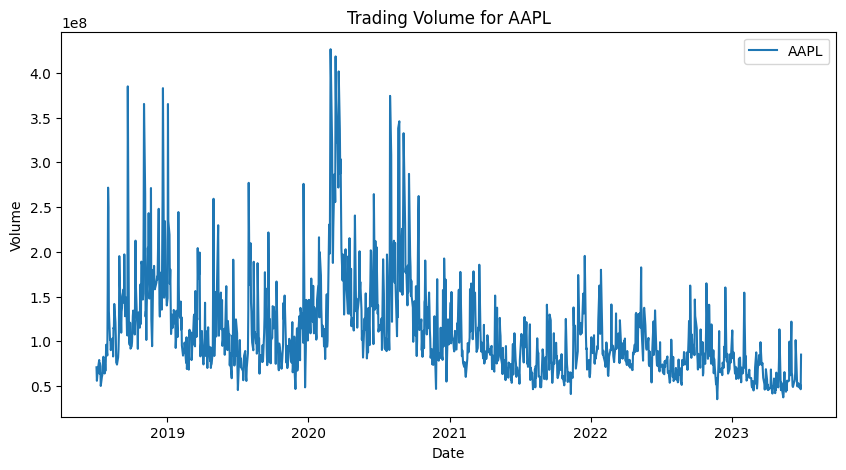

[*********************100%%**********************]  1 of 1 completed


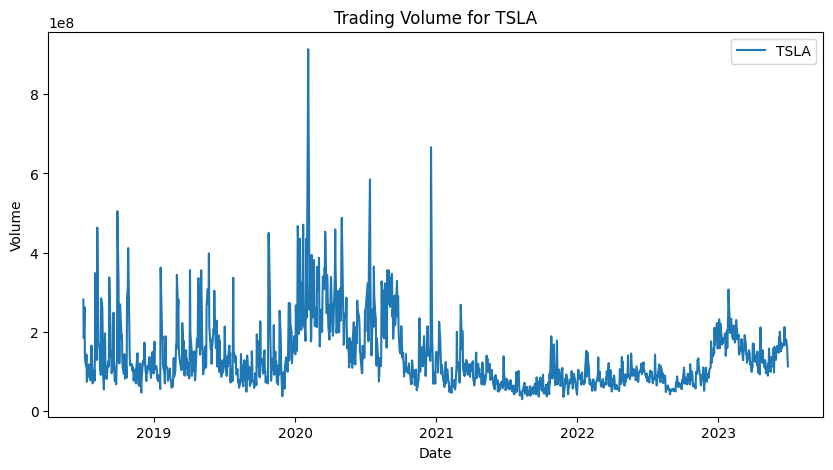

[*********************100%%**********************]  1 of 1 completed


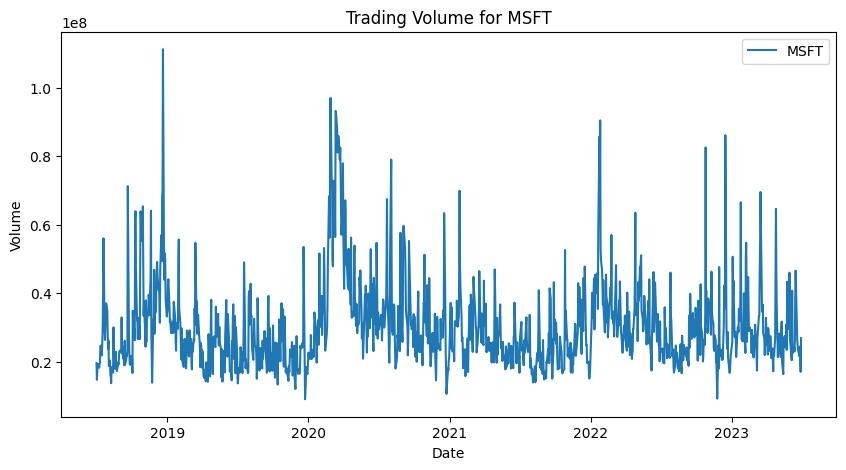

[*********************100%%**********************]  1 of 1 completed


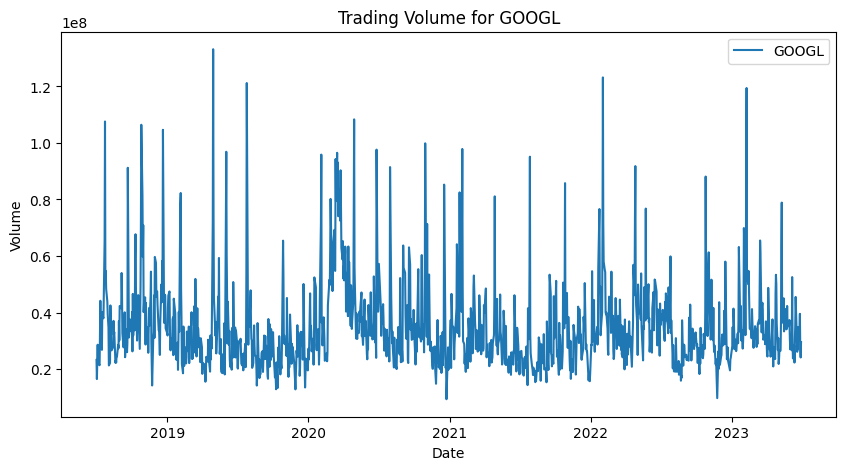

In [60]:
import yfinance as yf
import matplotlib.pyplot as plt

tickers = ["AAPL", "TSLA", "MSFT", "GOOGL"]

start_date = "2018-07-01"
end_date = "2023-07-01"

for ticker in tickers:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    
    # Ploting trading volume
    plt.figure(figsize=(10, 5))
    plt.plot(stock_data.index, stock_data['Volume'], label=ticker)
    plt.title(f'Trading Volume for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

In [ ]:
#%pip install pytrends